# Proteogenomic landscape of breast cancer (CPTAC, Cell 2020)

*“Proteogenomic Landscape of Breast Cancer Tumorigenesis and Targeted Therapy”*, Krug et al. 

The work integrates next-generation DNA and RNA sequencing and mass spectrometry-based proteomics to provide deep, unbiased quantification of proteins and post-translational modifications (such as phosphorylation). This integrative approach, that is called Proteogenomic approach, was applied to **122 treatment-naïve primary breast cancers** accrued to preserve post-translational modifications. 
It allows investigators to explore correlations between the genomic landscape and the downstream effects in the BRCA proteome, phosphoproteome, and acetylproteome, extending and refining analytical opportunities provided by prior studies. 

Histopathologically-defined adult breast tumors from newly diagnosed patients were considered for analysis. The cohort ranged in age from 30–95. Cases with prior history of other malignancies within the past 12 months were excluded. Cases with any prior systemic chemotherapy, endocrine therapy or biological therapy for any cancer, or prior history of radiation therapy involving the breast such as mantle field radiation for Hodgkins Disease or radiotherapy for lung cancer, were excluded. Patients who were found to have a diagnosis other than invasive breast cancer as a result of the surgery were also excluded.

Somatic mutations were detected using the Cancer Genome Analysis WES (Whole-Exome Sequencing) Characterization Pipeline. This pipeline is the Getz Lab’s standard computational workflow for characterizing a tumor sample’s somatic variants through contrastive computational analysis of matched tumor-normal WES BAMs.


In [1]:
import os

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Datasets/Proteogenomic landscape of breast cancer (CPTAC, Cell 2020)")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ydata_profiling as yp
from ydata_profiling import ProfileReport

## Patient clinical data 

In [4]:
data_clinical_patient=pd.read_csv('data_clinical_patient.csv', sep=None, engine='python')
data_clinical_patient

PATIENT_ID  AGE     SEX                  ETHNICITY  \
0    CPT000814  NaN     NaN  Black or African American   
1    CPT001846  NaN     NaN                      White   
2     X01BR001   55  Female  Black or African American   
3     X01BR008  NaN     NaN                        NaN   
4     X01BR009  NaN     NaN                        NaN   
..         ...  ...     ...                        ...   
117   X21BR001  NaN     NaN                      White   
118   X21BR002  NaN     NaN                      White   
119   X21BR010   71  Female                      White   
120   X22BR005   46  Female                      White   
121   X22BR006   55  Female  Black or African American   

    ER_UPDATED_CLINICAL_STATUS PR_CLINICAL_STATUS  \
0                     Negative           negative   
1                     Negative           negative   
2                     Negative           negative   
3                          NaN                NaN   
4                     Negative           negative   
..                         ...                ...   
117                   Negative           negative   
118                   Positive           positive   
119                   Positive           positive   
120                   Positive           positive   
121                   Positive           positive   

    ERBB2_UPDATED_CLINICAL_STATUS TNBC_UPDATED_CLINICAL_STATUS  \
0                             NaN                     Positive   
1                             NaN                     Positive   
2                        Negative                     Positive   
3                             NaN                          NaN   
4                             NaN                     Positive   
..                            ...                          ...   
117                           NaN                     Negative   
118                           NaN                     Negative   
119                      Negative                     negative   
120                      Positive                     Negative   
121                      Negative                     negative   

    ERBB2_PROTEOGENOMIC_STATUS TOP2A_PROTEOGENOMIC_STATUS  ...  \
0                     Negative                   negative  ...   
1                     Negative                   negative  ...   
2                     Negative                   negative  ...   
3                     Negative                   negative  ...   
4                     Negative                   negative  ...   
..                         ...                        ...  ...   
117                   Positive                   Negative  ...   
118                   negative                   Negative  ...   
119                   Negative                   negative  ...   
120                   Positive                   Negative  ...   
121                   Negative                   negative  ...   

     ESTIMATE_IMMUNE_SCORE  XCELL_IMMUNE_SCORE  ESTIMATE_STROMAL_SCORE  \
0              846.350.897              0.0414            -812.409.581   
1            1.425.391.899              0.0766              49.560.375   
2              475.804.314              0.0103            -476.863.678   
3              280.959.164              0.4840             -77.281.727   
4              166.485.538              0.0926              72.573.435   
..                     ...                 ...                     ...   
117          2.014.358.538              0.1573             -35.342.048   
118            195.658.573              0.1577             711.234.125   
119            628.877.273              0.0293             830.372.368   
120          1.346.716.615              0.0647             188.859.577   
121            101.234.597              0.0553             518.765.898   

    XCELL_STROMAL_SCORE CD3_TILS_STATUS  CD3_TILS_COUNTS APOBEC_SIGNATURE  \
0                0.0000   not performed    not performed                N   
1                0.0236   not performed  

In [5]:
profile_patient = ProfileReport(data_clinical_patient, title="Pandas Profiling Report")

In [6]:
profile_patient

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The observations (patients) are 122. 

In [7]:
patient_ID = data_clinical_patient[['PATIENT_ID']]

#### Select TNBC patients 

In [8]:
TN_pts = data_clinical_patient.loc[data_clinical_patient['TNBC_UPDATED_CLINICAL_STATUS']=='Positive']

In [9]:
TN_pts = TN_pts[['PATIENT_ID']]

In [10]:
len(TN_pts)

28

#### Select non-TNBC patients

In [11]:
# select the patients not TN
x = pd.concat([TN_pts, patient_ID])
NON_TN_pts= x.drop_duplicates(keep=False, inplace=False)

## Samples clinical data 

In [12]:
data_clinical_sample=pd.read_csv('data_clinical_sample.csv', sep=None, engine='python')
print(data_clinical_sample)

    PATIENT_ID  SAMPLE_ID    CANCER TYPE       CANCER_TYPE_DETAILED  \
0    CPT000814  CPT000814  Breast Cancer  Invasive Breast Carcinoma   
1    CPT001846  CPT001846  Breast Cancer  Invasive Breast Carcinoma   
2     X01BR001   X01BR001  Breast Cancer  Invasive Breast Carcinoma   
3     X01BR008   X01BR008  Breast Cancer  Invasive Breast Carcinoma   
4     X01BR009   X01BR009  Breast Cancer  Invasive Breast Carcinoma   
..         ...        ...            ...                        ...   
117   X21BR001   X21BR001  Breast Cancer  Invasive Breast Carcinoma   
118   X21BR002   X21BR002  Breast Cancer  Invasive Breast Carcinoma   
119   X21BR010   X21BR010  Breast Cancer  Invasive Breast Carcinoma   
120   X22BR005   X22BR005  Breast Cancer  Invasive Breast Carcinoma   
121   X22BR006   X22BR006  Breast Cancer  Invasive Breast Carcinoma   

     ISCHEMIA_TIME_IN_MINUTES NMF_CLUSTER  NMF_CLUSTER_MEMBERSHIP_SCORE  \
0                         NaN     Basal-I                         1.000 

In [13]:
profile_sample = ProfileReport(data_clinical_sample, title="Pandas Profiling Report")

In [14]:
profile_sample

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The number of samples is equal to the number of patients (122). The Breast Cancer is Invasive for all the samples. 
BRCA was classified in subtypes using both non-negative matrix factorization (NMF) and PAM50 method.
The tumor stage information is present (12.3% of missing values). 

## Mutational data 

In [15]:
data_mutation=pd.read_csv('data_mutations_final.csv', sep=None, engine='python')
print(data_mutation)

      Hugo_Symbol  Entrez_Gene_Id Center NCBI_Build Chromosome  \
0            SZT2               0      .     GRCh37          1   
1           AGBL4               0      .     GRCh37          1   
2          PTGER3               0      .     GRCh37          1   
3            HFM1               0      .     GRCh37          1   
4           PRUNE               0      .     GRCh37          1   
...           ...             ...    ...        ...        ...   
29013      ZNF652               0      .     GRCh37         17   
29014       GALK1               0      .     GRCh37         17   
29015      ZNF584               0      .     GRCh37         19   
29016       ASXL1               0      .     GRCh37         20   
29017       SYTL5               0      .     GRCh37          X   

       Start_Position  End_Position Strand Variant_Classification  \
0            43908878      43908878      +      Missense_Mutation   
1            49283877      49283877      +                 Intron   


In [16]:
profile_mutation = ProfileReport(data_mutation, title="Pandas Profiling Report")

The MAF file contains 29018 observations (rows) and the mutated distinct genes are 11775. 

The reference genome used for the alignment (NCBI_Build) is GRCh37 for all the observations.

24 chromosomes harbor mutations, even the sexual chromosomes X and Y.
**For SNPs, the Start_Position=End_Position.**
The 59.4% of the mutations are missense mutations and for the 97.3% they are SNPs. 
Protein_position has the 4.7% of missing values (1375).
BIOTYPE variable indicates that the 99.5% of mutations is in protein_coding genes.

In [18]:
# keep only the relevant variables of the MAF file
data_mutation_relevant=data_mutation[['Tumor_Sample_Barcode', 'Hugo_Symbol', 'Chromosome', 'Start_Position', 'End_Position', 'Variant_Classification', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'Match_Norm_Seq_Allele1', 'Match_Norm_Seq_Allele2', 'HGVSc', 'HGVSp_Short', 'Protein_position', 'CDS_position', 'IMPACT', 'cDNA_position', 'SWISSPROT','Transcript_ID', 'ENSP']] 

In this dataset sample IDs and patient IDs are equal.

In [19]:
patient_sample=data_clinical_sample.iloc[:,0:2]

In [20]:
# adding the patient_ID to the mutation dataset 
data_mutation_sample_pts = data_mutation_relevant.join(patient_sample.set_index('SAMPLE_ID'), on='Tumor_Sample_Barcode')

In [21]:
data_mutation_sample_pts=data_mutation_sample_pts[['Tumor_Sample_Barcode', 'PATIENT_ID', 'Hugo_Symbol', 'Chromosome', 'Start_Position', 'End_Position', 'Variant_Classification', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'Match_Norm_Seq_Allele1', 'Match_Norm_Seq_Allele2', 'HGVSc', 'HGVSp_Short', 'Protein_position', 'CDS_position', 'IMPACT', 'cDNA_position', 'SWISSPROT','Transcript_ID', 'ENSP']] 

In [22]:
data_mutation_sample_pts=data_mutation_sample_pts[['Tumor_Sample_Barcode', 'PATIENT_ID','Hugo_Symbol', 'Chromosome', 'Start_Position', 'End_Position', 'Variant_Classification', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'HGVSc', 'HGVSp_Short', 'Protein_position','Transcript_ID', 'ENSP']].copy() 

In [23]:
data_mutation_sample_pts.to_csv('mutation_table_Krug_et_al_Cell_2018.csv')

In [24]:
# reload the dataset with the addition of the gene length
data_mutation_sample_pts= pd.read_csv('mutation_table_Krug_et_al_Cell_2018_FINAL.csv', sep=None, engine='python')
data_mutation_sample_pts = data_mutation_sample_pts.iloc[:, 1:]

In [25]:
# select the unique mutated patients 
mutated_pts = data_mutation_sample_pts['PATIENT_ID'].unique()
mutated_pts = pd.DataFrame(mutated_pts, columns = ['PATIENT_ID'])

In [26]:
# select the mutated TN ductal carcinoma patients 
mutated_TN_pts = pd.merge(TN_pts, mutated_pts, how='inner', on=['PATIENT_ID'])

In [27]:
len(mutated_TN_pts)

28

In [28]:
data_mutation_TN_pts = pd.merge(TN_pts, data_mutation_sample_pts, how='inner', on=['PATIENT_ID'])

In [29]:
data_mutation_TN_pts['PATIENT_ID'].nunique()

28

In [30]:
# save the dataset 
data_mutation_TN_pts.to_csv('mutation_table_Krug_et_al_Cell_2020_TN.csv')

In [31]:
# select the mutated NON TN patients 
mutated_NON_TN_pts = pd.merge(NON_TN_pts, mutated_pts, how='inner', on=['PATIENT_ID'])

In [32]:
data_mutation_NON_TN_pts = pd.merge(NON_TN_pts, data_mutation_sample_pts, how='inner', on=['PATIENT_ID'])

In [33]:
data_mutation_NON_TN_pts['PATIENT_ID'].nunique()

94

In [34]:
# save the dataset 
data_mutation_NON_TN_pts.to_csv('mutation_table_Krug_et_al_Cell_2020_NON_TN.csv')

### Mutation Rate analysis

In [35]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_sample_pts.loc[:, 'Mutation_length'] = data_mutation_sample_pts['End_Position']-data_mutation_sample_pts['Start_Position']+1

In [36]:
data_mutation_sample_pts['PATIENT_ID'].nunique()

122

There are 122 patients. 

In [37]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length = data_mutation_sample_pts[['PATIENT_ID', 'Mutation_length']]

In [38]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_Krug_et_al_group_by_pts=pts_mutation_length.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_Krug_et_al_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [39]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation = data_mutation_sample_pts[['Hugo_Symbol', 'Gene_length']]

In [40]:
# look at the number of distinct genes
gene_length_for_each_mutation['Hugo_Symbol'].nunique()

11778

In the dataset, in total 11778 distinct mutated genes are present.

In [41]:
# group by gene (Hugo_Symbol) 
mutation_Krug_et_al_group_by_gene=gene_length_for_each_mutation.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [42]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength = mutation_Krug_et_al_group_by_gene['Gene_length'].sum()

In [43]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_Krug_et_al_group_by_pts["Mutation_rate"] = mutation_Krug_et_al_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength

In [44]:
# multiply the Mutation_rate values times 10^6
mutation_Krug_et_al_group_by_pts["Mutation_rate*10^6"] = mutation_Krug_et_al_group_by_pts["Mutation_rate"]*1000000

In [45]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_Krug_et_al_group_by_pts = mutation_Krug_et_al_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [46]:
patient_mutation_rate=mutation_Krug_et_al_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [47]:
# adjust the indices
patient_mutation_rate = patient_mutation_rate.reset_index()
patient_mutation_rate = patient_mutation_rate.drop('index', axis=1)

In [48]:
patient_mutation_rate.head(20)

PATIENT_ID  Mutation_rate*10^6
0    X01BR043           13.447599
1    X18BR003            1.496460
2    X11BR003            1.158550
3    X15BR003            0.989081
4    X05BR029            0.629602
5    X01BR018            0.598789
6    X05BR038            0.549489
7    X11BR031            0.520731
8    X11BR075            0.463214
9    X21BR001            0.403644
10   X20BR005            0.395427
11   X05BR043            0.366669
12   X11BR055            0.327640
13   X20BR007            0.304017
14   X05BR042            0.291692
15   X16BR012            0.279367
16   X11BR009            0.279367
17   X01BR020            0.272177
18   X18BR002            0.257798
19   X01BR027            0.257798

In [49]:
patients=np.arange(0,122,1)
# convert a series into a Numpy array
mutation_rate=mutation_Krug_et_al_group_by_pts[['Mutation_rate*10^6']].to_numpy()

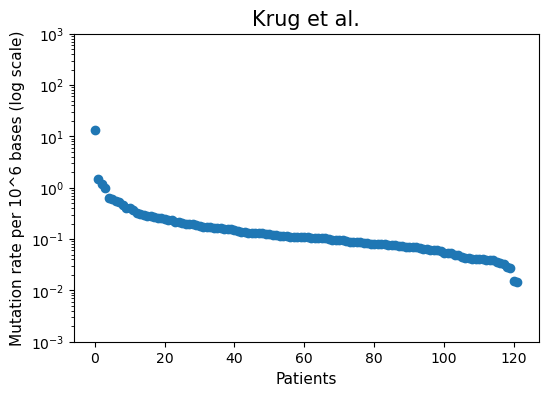

In [50]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log")
plt.ylim(0.001, 1000)
plt.scatter(patients, mutation_rate)
#plt.axvline(x=3.22, color='green', linestyle='-', label='Hyper-mutated threshold')
#plt.axhline(y=0.9, color='red', linestyle='-', label='Hyper-mutated threshold')  # Fixed the missing parenthesis here
plt.xlabel("Patients", fontsize=11)
plt.ylabel("Mutation rate per 10^6 bases (log scale)", fontsize=11)
#plt.legend(fontsize=10) # Added legend for the threshold line
plt.title("Krug et al.", fontsize=15)
plt.show()

### Hyper-mutated threshold study - manual approach

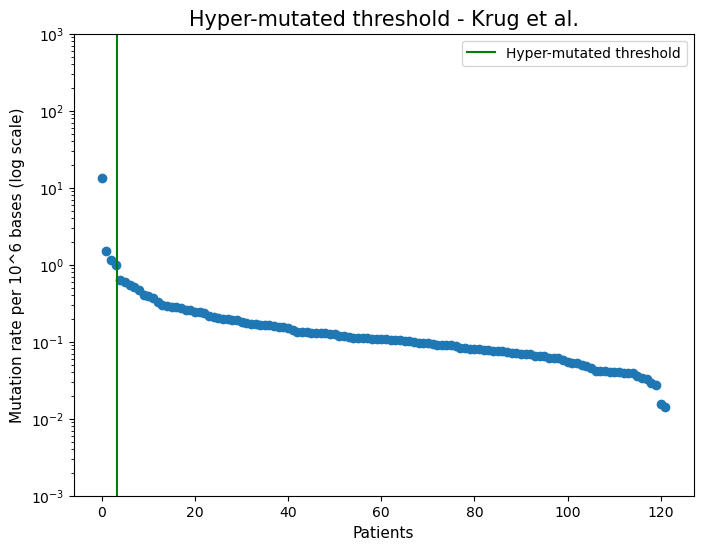

In [51]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log")
plt.ylim(0.001, 1000)
plt.scatter(patients, mutation_rate)
plt.axvline(x=3.22, color='green', linestyle='-', label='Hyper-mutated threshold')
#plt.axhline(y=0.9, color='red', linestyle='-', label='Hyper-mutated threshold')  # Fixed the missing parenthesis here
plt.xlabel("Patients", fontsize=11)
plt.ylabel("Mutation rate per 10^6 bases (log scale)", fontsize=11)
plt.legend(fontsize=10) # Added legend for the threshold line
plt.title("Hyper-mutated threshold - Krug et al.", fontsize=15)
plt.show()

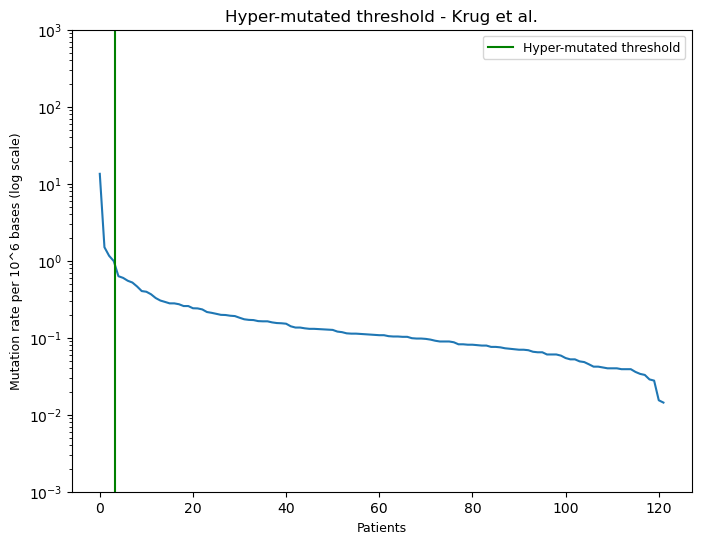

In [52]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log")
plt.ylim(0.001, 1000)
plt.plot(patients, mutation_rate)
plt.axvline(x=3.22, color='green', linestyle='-', label='Hyper-mutated threshold')
#plt.axhline(y=0.9, color='red', linestyle='-', label='Hyper-mutated threshold')  # Fixed the missing parenthesis here
plt.xlabel("Patients", fontsize=9)
plt.ylabel("Mutation rate per 10^6 bases (log scale)", fontsize=9)
plt.legend(fontsize=9) # Added legend for the threshold line
plt.title("Hyper-mutated threshold - Krug et al.", fontsize=12)
plt.show()

(0.2793665988480968, 13.447598818816656)

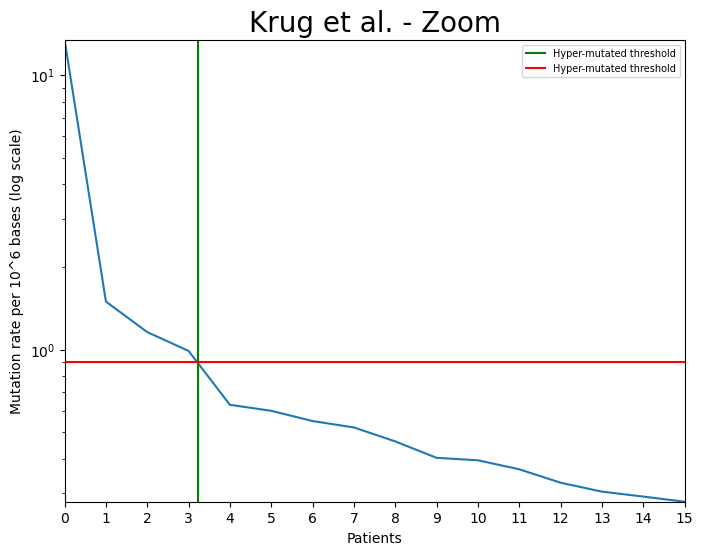

In [53]:
# ZOOM
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
plt.plot(patients, mutation_rate)
plt.xticks(np.arange(min(patients), max(patients)+1, 1.0))
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("Krug et al. - Zoom",fontsize=20)
x1_Krug, y1_Krug = (patients[0], patient_mutation_rate.loc[0, 'Mutation_rate*10^6'])
x2_Krug, y2_Krug = (patients[15], patient_mutation_rate.loc[15, 'Mutation_rate*10^6'])
plt.axvline(x=3.22, color='green', linestyle='-', label='Hyper-mutated threshold')
plt.axhline(y=0.9, color='red', linestyle='-', label='Hyper-mutated threshold')  # Fixed the missing parenthesis here
plt.legend(loc='upper right', fontsize = 7)
plt.gca().set_xlim(x1_Krug, x2_Krug)
plt.gca().set_ylim(y2_Krug, y1_Krug)

In [54]:
array_mutation_rate_TOTAL_ductal = np.array(patient_mutation_rate['Mutation_rate*10^6'])

### Hyper-mutated threshold study - KneeLocator approach

In [55]:
colonne_iper = ['Studio', 'x_max', 'mutation rate x_max', 'x_max+1', 'mutation_rate x_max+1', 'gap']
df_soglia_iper = pd.DataFrame(columns = colonne_iper)

In [56]:
y_Krug2=np.array(patient_mutation_rate['Mutation_rate*10^6'])

118
dx_3: 117
yx_3: -1.483244445207043
dx_4: 118
yx_4: -1.5412363921847299
gap_max 0.05799194697768684
dim_finale_x_sx: 117
dim_inizio_y_sx: 5
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116]
[ 1.12864474  0.17506513  0.06391468 -0.00476814 -0.20093395 -0.22272587
 -0.26004064 -0.28338646 -0.33421788 -0.39400187 -0.40293369 -0.43572621
 -0.48460374 -0.51710271 -0.53507608 -0.55382552 -0.55382552 -0.56514855
 -0.5887207  -0.5887207  -0.61732656 -0.61917857 -0.63236857 -0.66617513
 -0.67664056 -0.68954135 -0.70283711 -0.70509319 -0.71423657 -0.71888148
 -0.74042116 -0.

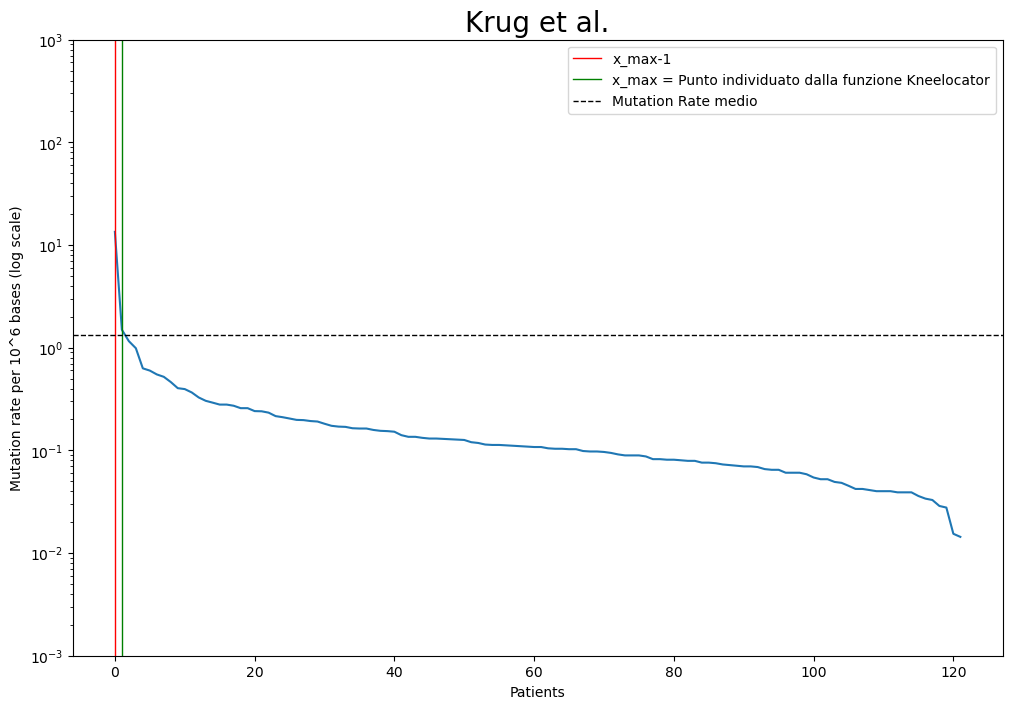

In [57]:
from kneed import KneeLocator, DataGenerator as dg

x_Krug=patients
y_Krug=np.array(np.log10(patient_mutation_rate['Mutation_rate*10^6']))

#punto di destra
kl = KneeLocator(x_Krug, y_Krug, S=0.1, curve="convex", direction="decreasing", online = True)
print(kl.knee)

x4 = kl.knee #primo punto che si trova considerando l'intera curva
y4 = y_Krug[x4]
x3 = kl.knee -1 # x3 è minore di x4; visto che la funzione è decrescente y3 sarà maggiore di y4
y3 = y_Krug[x3]
dim_inizio_x = 0
dim_finale_x = len(x_Krug)
dim_inizio_y = 0
dim_finale_y = len(y_Krug) 

print('dx_3:', x3)   
print('yx_3:', y3)   
print('dx_4:', x4)   
print('yx_4:', y4)   

gap_max_Krug = abs(y4 - y3) # visto che la funzione è decrescente. Il gap si riferisce alla ripidità della curva.
print('gap_max', gap_max_Krug) 
x_max_Krug = x3

dim_finale_x = x3
print('dim_finale_x_sx:', dim_finale_x)   
dim_inizio_y = dim_finale_y - x3    # !! In questo modo, i sub-intervalli considerati sia per x che per y sono uguali
print('dim_inizio_y_sx:', dim_inizio_y)   

x_sub = x_Krug[0:dim_finale_x] 
y_sub = y_Krug[0:x3] 
# x_sub e y_sub hanno la stessa lunghezza

print(x_sub)
print(y_sub)

while (dim_finale_x > 1): # Questo limite (1) può variare in base al dataset
    kl = KneeLocator(x_sub, y_sub, S=0.1, curve="convex", direction="decreasing", online = True)
    print(kl.knee)

    x4 = kl.knee
    y4 = y_Krug[x4]
    x3 = kl.knee - 1
    y3 = y_Krug[x3]

    print('dx_3:', x3)   
    print('yx_3:', y3)
    print('dx_4:', x4)
    print('yx_4:', y4)

    gap = abs(y4 - y3) # essendo la funzione decrescente, se x4 > x3, allora y4 < y3 
    print('gap', gap)

    if gap > gap_max_Krug: # aggiorna il gap massimo!!!
        gap_max_Krug = gap
        print('gap_max:',gap_max_Krug)
        x_max_Krug = x4  # x4 > x3
        print('x:', x_max_Krug)
    

    dim_finale_x = x3
    print('dim_finale_x:', dim_finale_x)
    dim_inizio_y = dim_finale_y - x3
    print('dim_inizio_y:', dim_inizio_y)

    x_sub = x_Krug[0:dim_finale_x]
    y_sub = y_Krug[0:x3]

    print(x_sub)
    print(y_sub)

y_max_Krug_inf = array_mutation_rate_TOTAL_ductal[x_max_Krug+1]
y_max_Krug_sup = array_mutation_rate_TOTAL_ductal[x_max_Krug]
y_max_Krug_avg = (y_max_Krug_inf + y_max_Krug_sup)/2
y_grafico_media = (y_Krug[x_max_Krug]+y_Krug[x_max_Krug-1])/2
print('gap_max:',gap_max_Krug)
print('x:',x_max_Krug)
print('mutation rate inf:', y_max_Krug_inf)
print('mutation rate sup:', y_max_Krug_sup)
print('mutation rate avg:', y_max_Krug_avg)
fig = plt.figure(figsize=(12, 8))
plt.plot(patients, mutation_rate)
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("Krug et al.",fontsize=20)
plt.axvline(x=x_max_Krug-1, color='red', linestyle='-', linewidth = 1,  label = 'x_max-1')
plt.axvline(x=x_max_Krug, color='green', linestyle='-', linewidth = 1, label = 'x_max = Punto individuato dalla funzione Kneelocator')
plt.axhline(y=y_max_Krug_avg, color='black', linestyle='--', linewidth = 1, label = 'Mutation Rate medio')
plt.legend()
#set axes limit
plt.ylim(0.001, 1000)
plt.show()

#'Studio', 'x_max', 'mutation rate x_max', 'x_max+1', 'mutation_rate x_max+1', 'gap'
#df_soglia_iper = df_soglia_iper.append({'Studio': 'Krug et al.', 'x_max': x_max_Krug, 'mutation rate x_max':y_max_Krug_sup,  'x_max+1': x_max_Krug+1, 'mutation_rate x_max+1': y_max_Krug_inf,'gap': gap_max_Krug }, ignore_index=True)

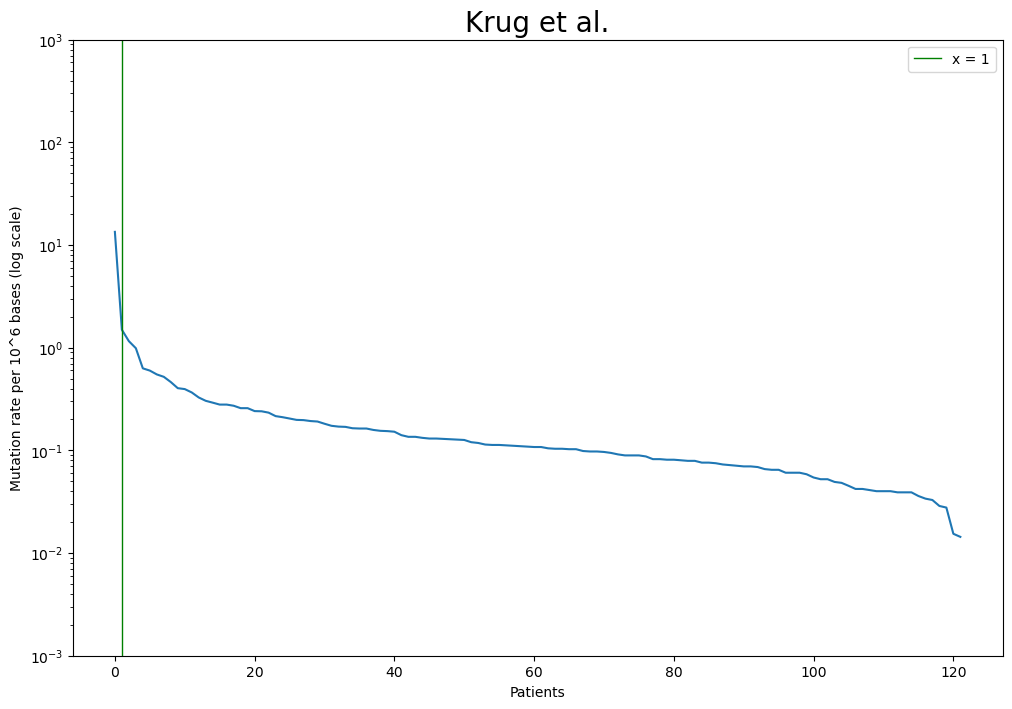

In [58]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.plot(x_Krug, y_Krug2)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.axvline(x=1, color='green', linestyle='-', linewidth = 1, label='x = 1')
plt.title ("Krug et al.",fontsize=20)
plt.legend()
plt.show()

## Zoom

(0.2793665988480968, 13.447598818816656)

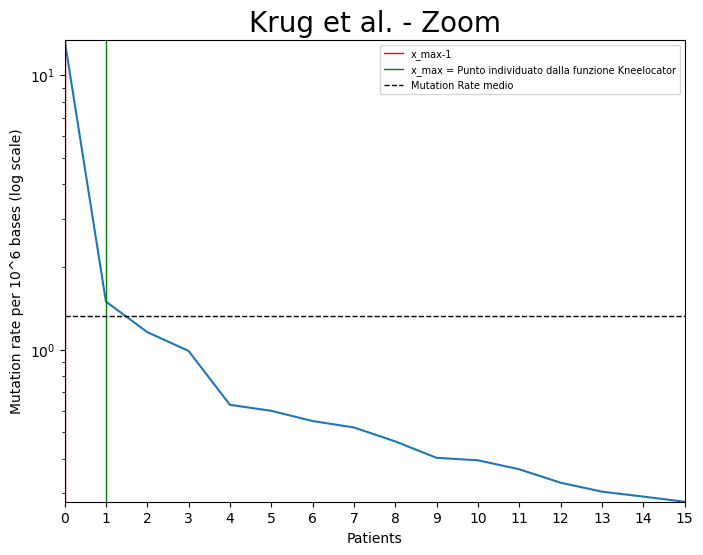

In [59]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
plt.plot(patients, mutation_rate)
plt.xticks(np.arange(min(patients), max(patients)+1, 1.0))
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("Krug et al. - Zoom",fontsize=20)
x1_Krug, y1_Krug = (patients[0], patient_mutation_rate.loc[0, 'Mutation_rate*10^6'])
x2_Krug, y2_Krug = (patients[15], patient_mutation_rate.loc[15, 'Mutation_rate*10^6'])
plt.axvline(x=x_max_Krug-1, color='red', linestyle='-', linewidth = 1,  label = 'x_max-1')
plt.axvline(x=x_max_Krug, color='green', linestyle='-', linewidth = 1, label = 'x_max = Punto individuato dalla funzione Kneelocator')
plt.axhline(y=y_max_Krug_avg, color='black', linestyle='--', linewidth = 1, label = 'Mutation Rate medio')
plt.legend(loc='upper right', fontsize = 7)
plt.gca().set_xlim(x1_Krug, x2_Krug)
plt.gca().set_ylim(y2_Krug, y1_Krug)

In [60]:
# create a table containing the iterated values: x3, y3, x4, y4, gap. For each row, one iteration.

x_Krug=patients
y_Krug=np.array(np.log10(patient_mutation_rate['Mutation_rate*10^6']))

#punto di destra
kl = KneeLocator(x_Krug, y_Krug, S=0.1, curve="convex", direction="decreasing", online = True)

x4 = kl.knee #primo punto che si trova considerando l'intera curva
y4 = y_Krug[x4]
x3 = kl.knee -1 # x3 è minore di x4; visto che la funzione è decrescente y3 sarà maggiore di y4
y3 = y_Krug[x3]
dim_inizio_x = 0
dim_finale_x = len(x_Krug) #164
dim_inizio_y = 0
dim_finale_y = len(x_Krug) #164

gap_Krug = abs(y4 - y3) # visto che la funzione è decrescente. Il gap si riferisce alla ripidità della curva.
x_max_Krug = x3

data = [[x4, y4, x3, y3, gap_Krug]] # inizializzo data con il primo risultato di Kneelocator

dim_finale_x = x3
dim_inizio_y = dim_finale_y - x3 # !! In questo modo, i sub-intervalli considerati sia per x che per y sono uguali

x_sub = x_Krug[0:dim_finale_x] # da 0 a 156 --> 156 = lunghezza del vettore
y_sub = y_Krug[0:x3] # da 8 a 164 --> 156 = lunghezza del vettore
# x_sub e y_sub hanno la stessa lunghezza

while (dim_finale_x > 1): # Questo limite (1) può variare in base al dataset
    kl = KneeLocator(x_sub, y_sub, S=0.1, curve="convex", direction="decreasing", online = True)
    
    x4 = kl.knee
    y4 = y_Krug[x4]
    x3 = kl.knee - 1
    y3 = y_Krug[x3]
    gap = abs(y4 - y3) # essendo la funzione decrescente, se x4 > x3, allora y4 < y3 

    data.append([x4, y4, x3, y3, gap])
  
    dim_finale_x = x3
    dim_inizio_y = dim_finale_y - x3
    dim_finale_y = x3
   
    x_sub = x_Krug[0:dim_finale_x]
    y_sub = y_Krug[0:x3]
    
cols=['x4','y4','x3','y3','gap']
result_KneeLocator = pd.DataFrame(data, columns=cols)  
result_KneeLocator

x4        y4   x3        y3       gap
0  118 -1.541236  117 -1.483244  0.057992
1  106 -1.375611  105 -1.344942  0.030669
2  103 -1.307153  102 -1.280824  0.026329
3  100 -1.264119   99 -1.232520  0.031599
4   96 -1.217542   95 -1.189054  0.028489
5   77 -1.085304   76 -1.058975  0.026329
6   41 -0.851674   40 -0.818133  0.033541
7    9 -0.394002    8 -0.334218  0.059784
8    1  0.175065    0  1.128645  0.953580

In [61]:
# save the dataset 
result_KneeLocator.to_csv('Points_foundbyKneeLocator_Krug.csv', index=False, sep=',')

### Mutation Frequency analysis

In [62]:
genes_patients=data_mutation_sample_pts[['PATIENT_ID', 'Hugo_Symbol']]

In [63]:
n_of_pts_per_gene = genes_patients.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [64]:
# the total number of patients is 122 
tot_pts = 122 

In [65]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene["Mutation_frequency (%)"] = (n_of_pts_per_gene["Num_pts_per_gene"]*100)/tot_pts

In [66]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene = n_of_pts_per_gene.sort_values(by="Num_pts_per_gene", ascending=False)

In [67]:
gene_mutation_frequency = n_of_pts_per_gene[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [68]:
# select the first 50 genes
highest_mutated_genes=gene_mutation_frequency.head(50)

In [69]:
mutated_gene_names=highest_mutated_genes['Hugo_Symbol'].tolist()

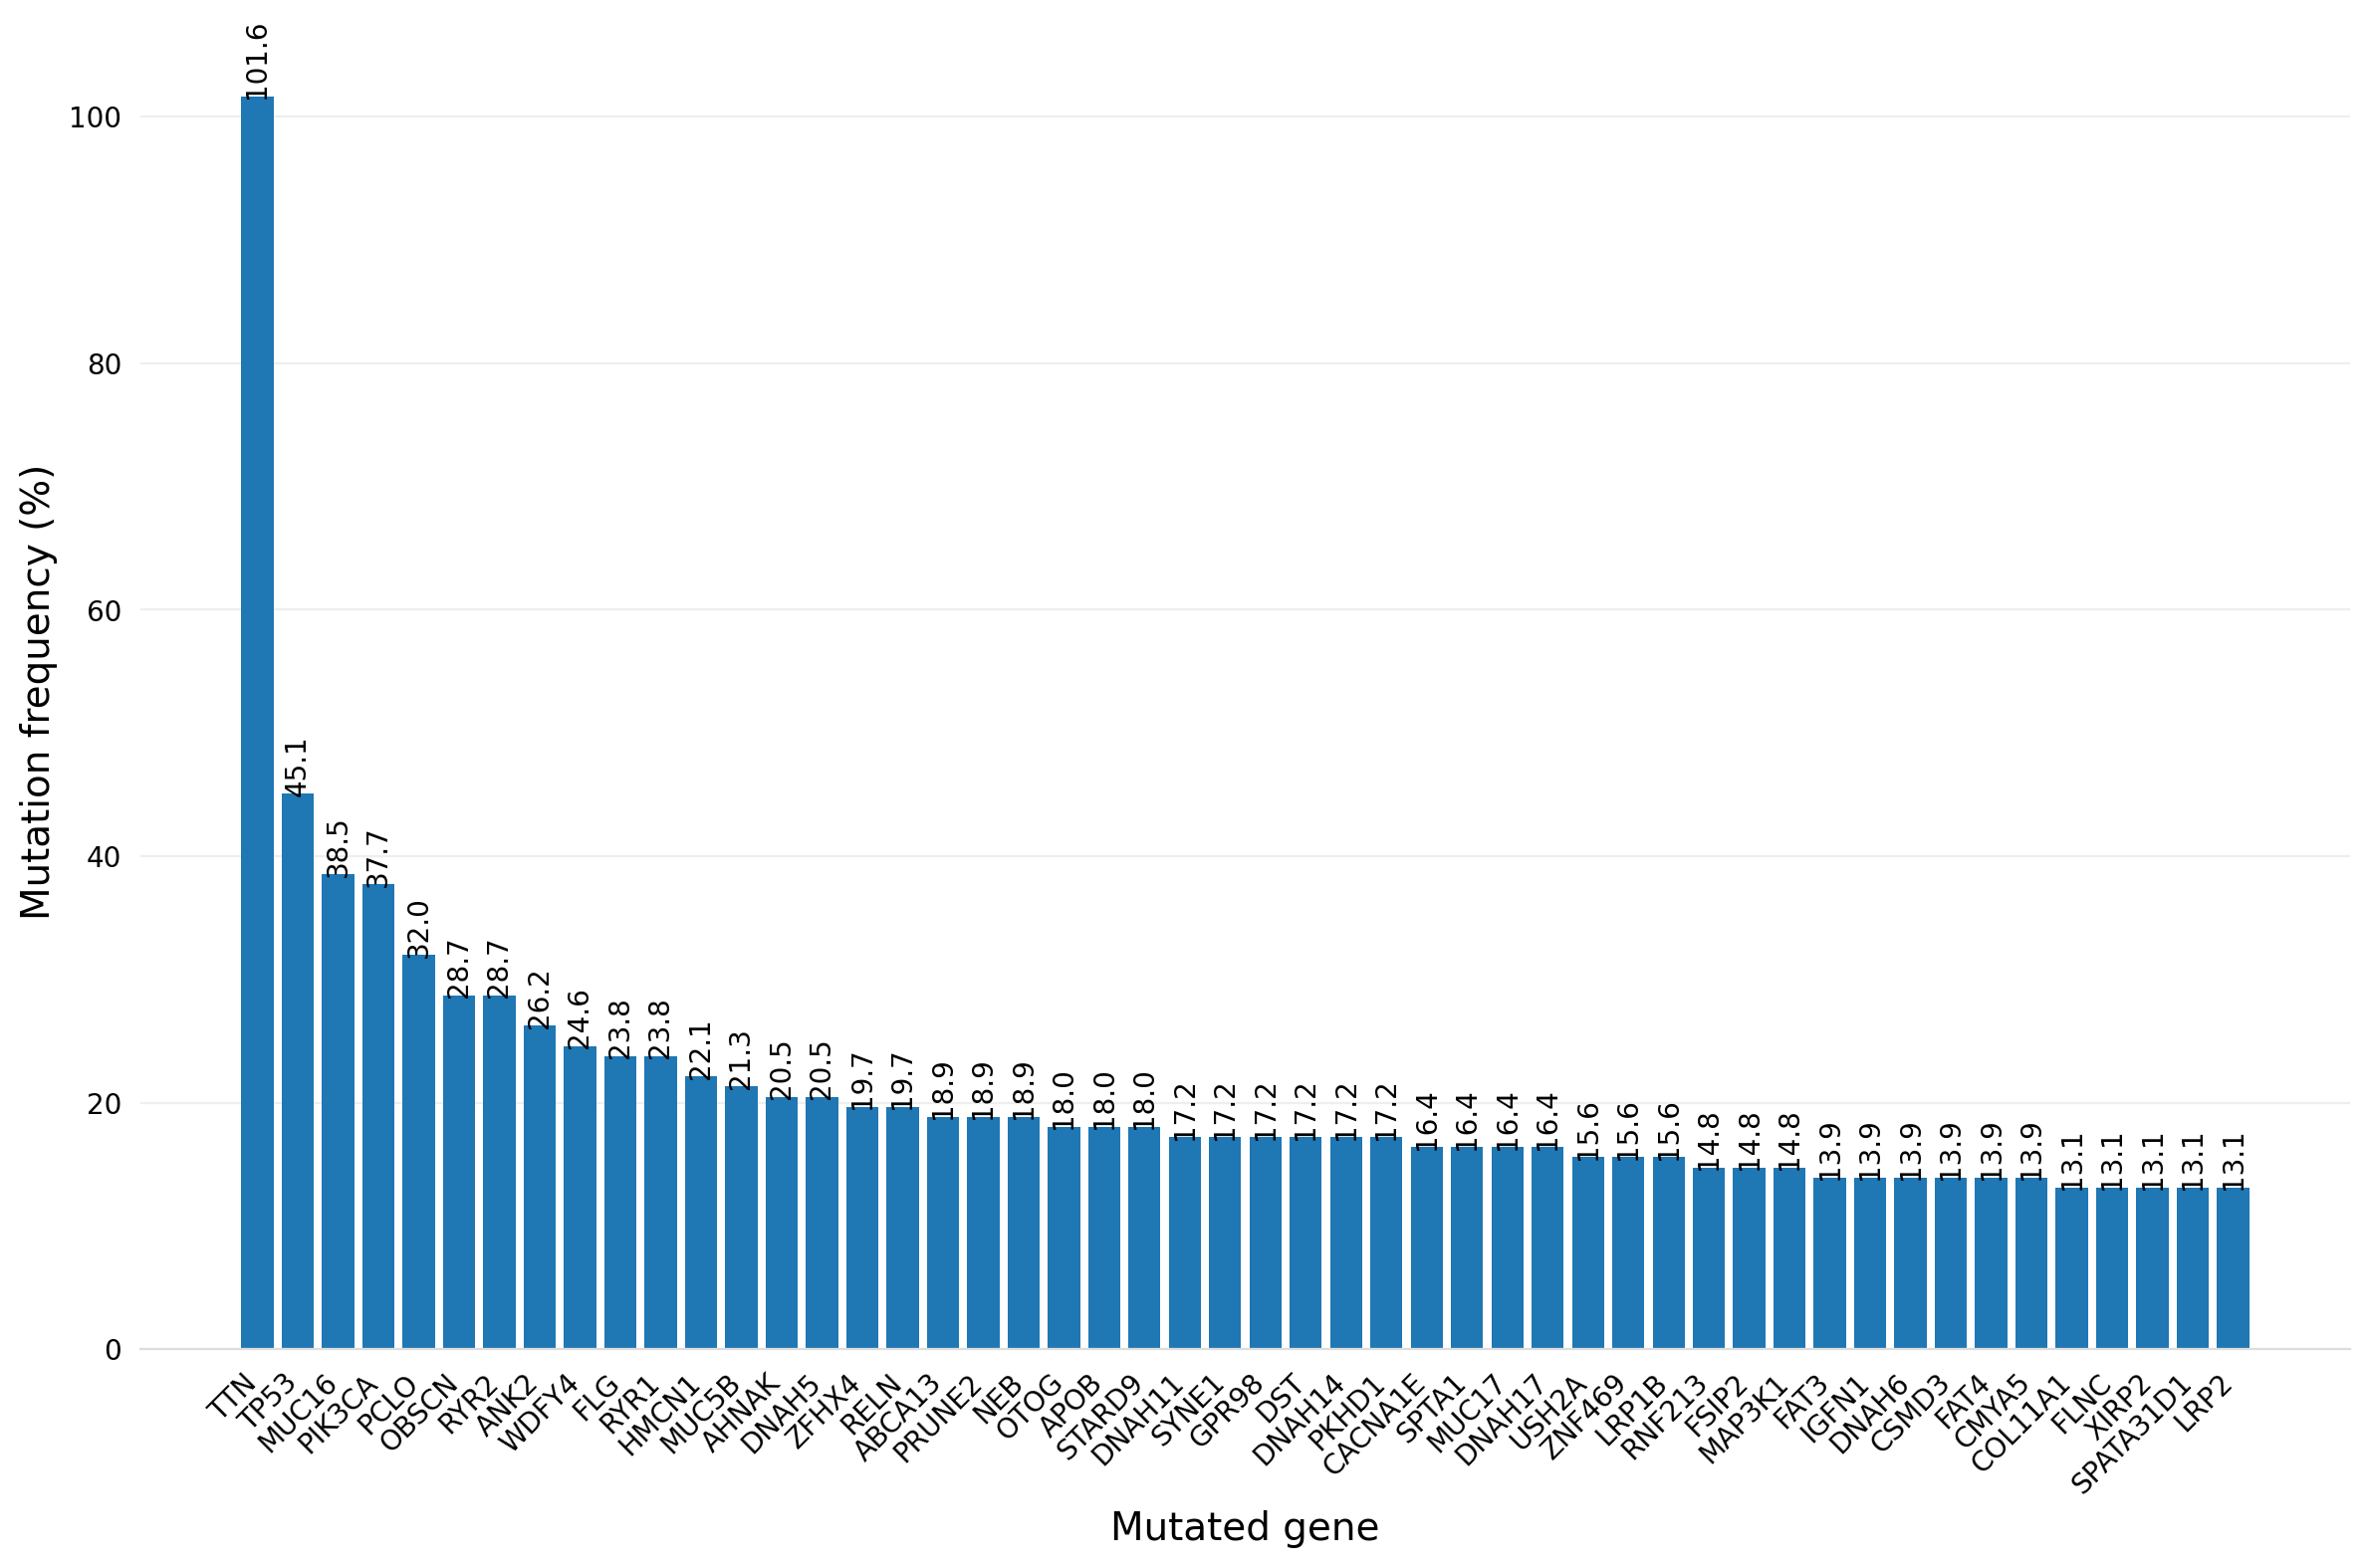

In [70]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes['Hugo_Symbol'], highest_mutated_genes['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

### Normalized mutation frequency analysis

In [71]:
# adding the gene length to the gene_mutation_frequency dataset 
gene_mutation_frequency_gene_length = gene_mutation_frequency.join(mutation_Krug_et_al_group_by_gene.set_index('Hugo_Symbol'), on='Hugo_Symbol')

In [72]:
# add a column to the gene_mutation_frequency_gene_length dataframe representing the mutation frequency for each gene, that is normalized based on the gene length
gene_mutation_frequency_gene_length["Normalized mutation frequency per 10^6"] = (gene_mutation_frequency_gene_length["Mutation_frequency (%)"]/gene_mutation_frequency_gene_length["Gene_length"])*10000

In [73]:
gene_normalized_mutation_frequency = gene_mutation_frequency_gene_length[['Hugo_Symbol', 'Normalized mutation frequency per 10^6']]

In [74]:
# the Normalized mutation frequency per gene is sorted in descending order
gene_normalized_mutation_frequency = gene_normalized_mutation_frequency.sort_values(by="Normalized mutation frequency per 10^6", ascending=False)

In [75]:
# select the first 50 genes
highest_mutated_genes_normalized_frequency=gene_normalized_mutation_frequency.head(50)

In [76]:
mutated_gene_names=highest_mutated_genes_normalized_frequency['Hugo_Symbol'].tolist()

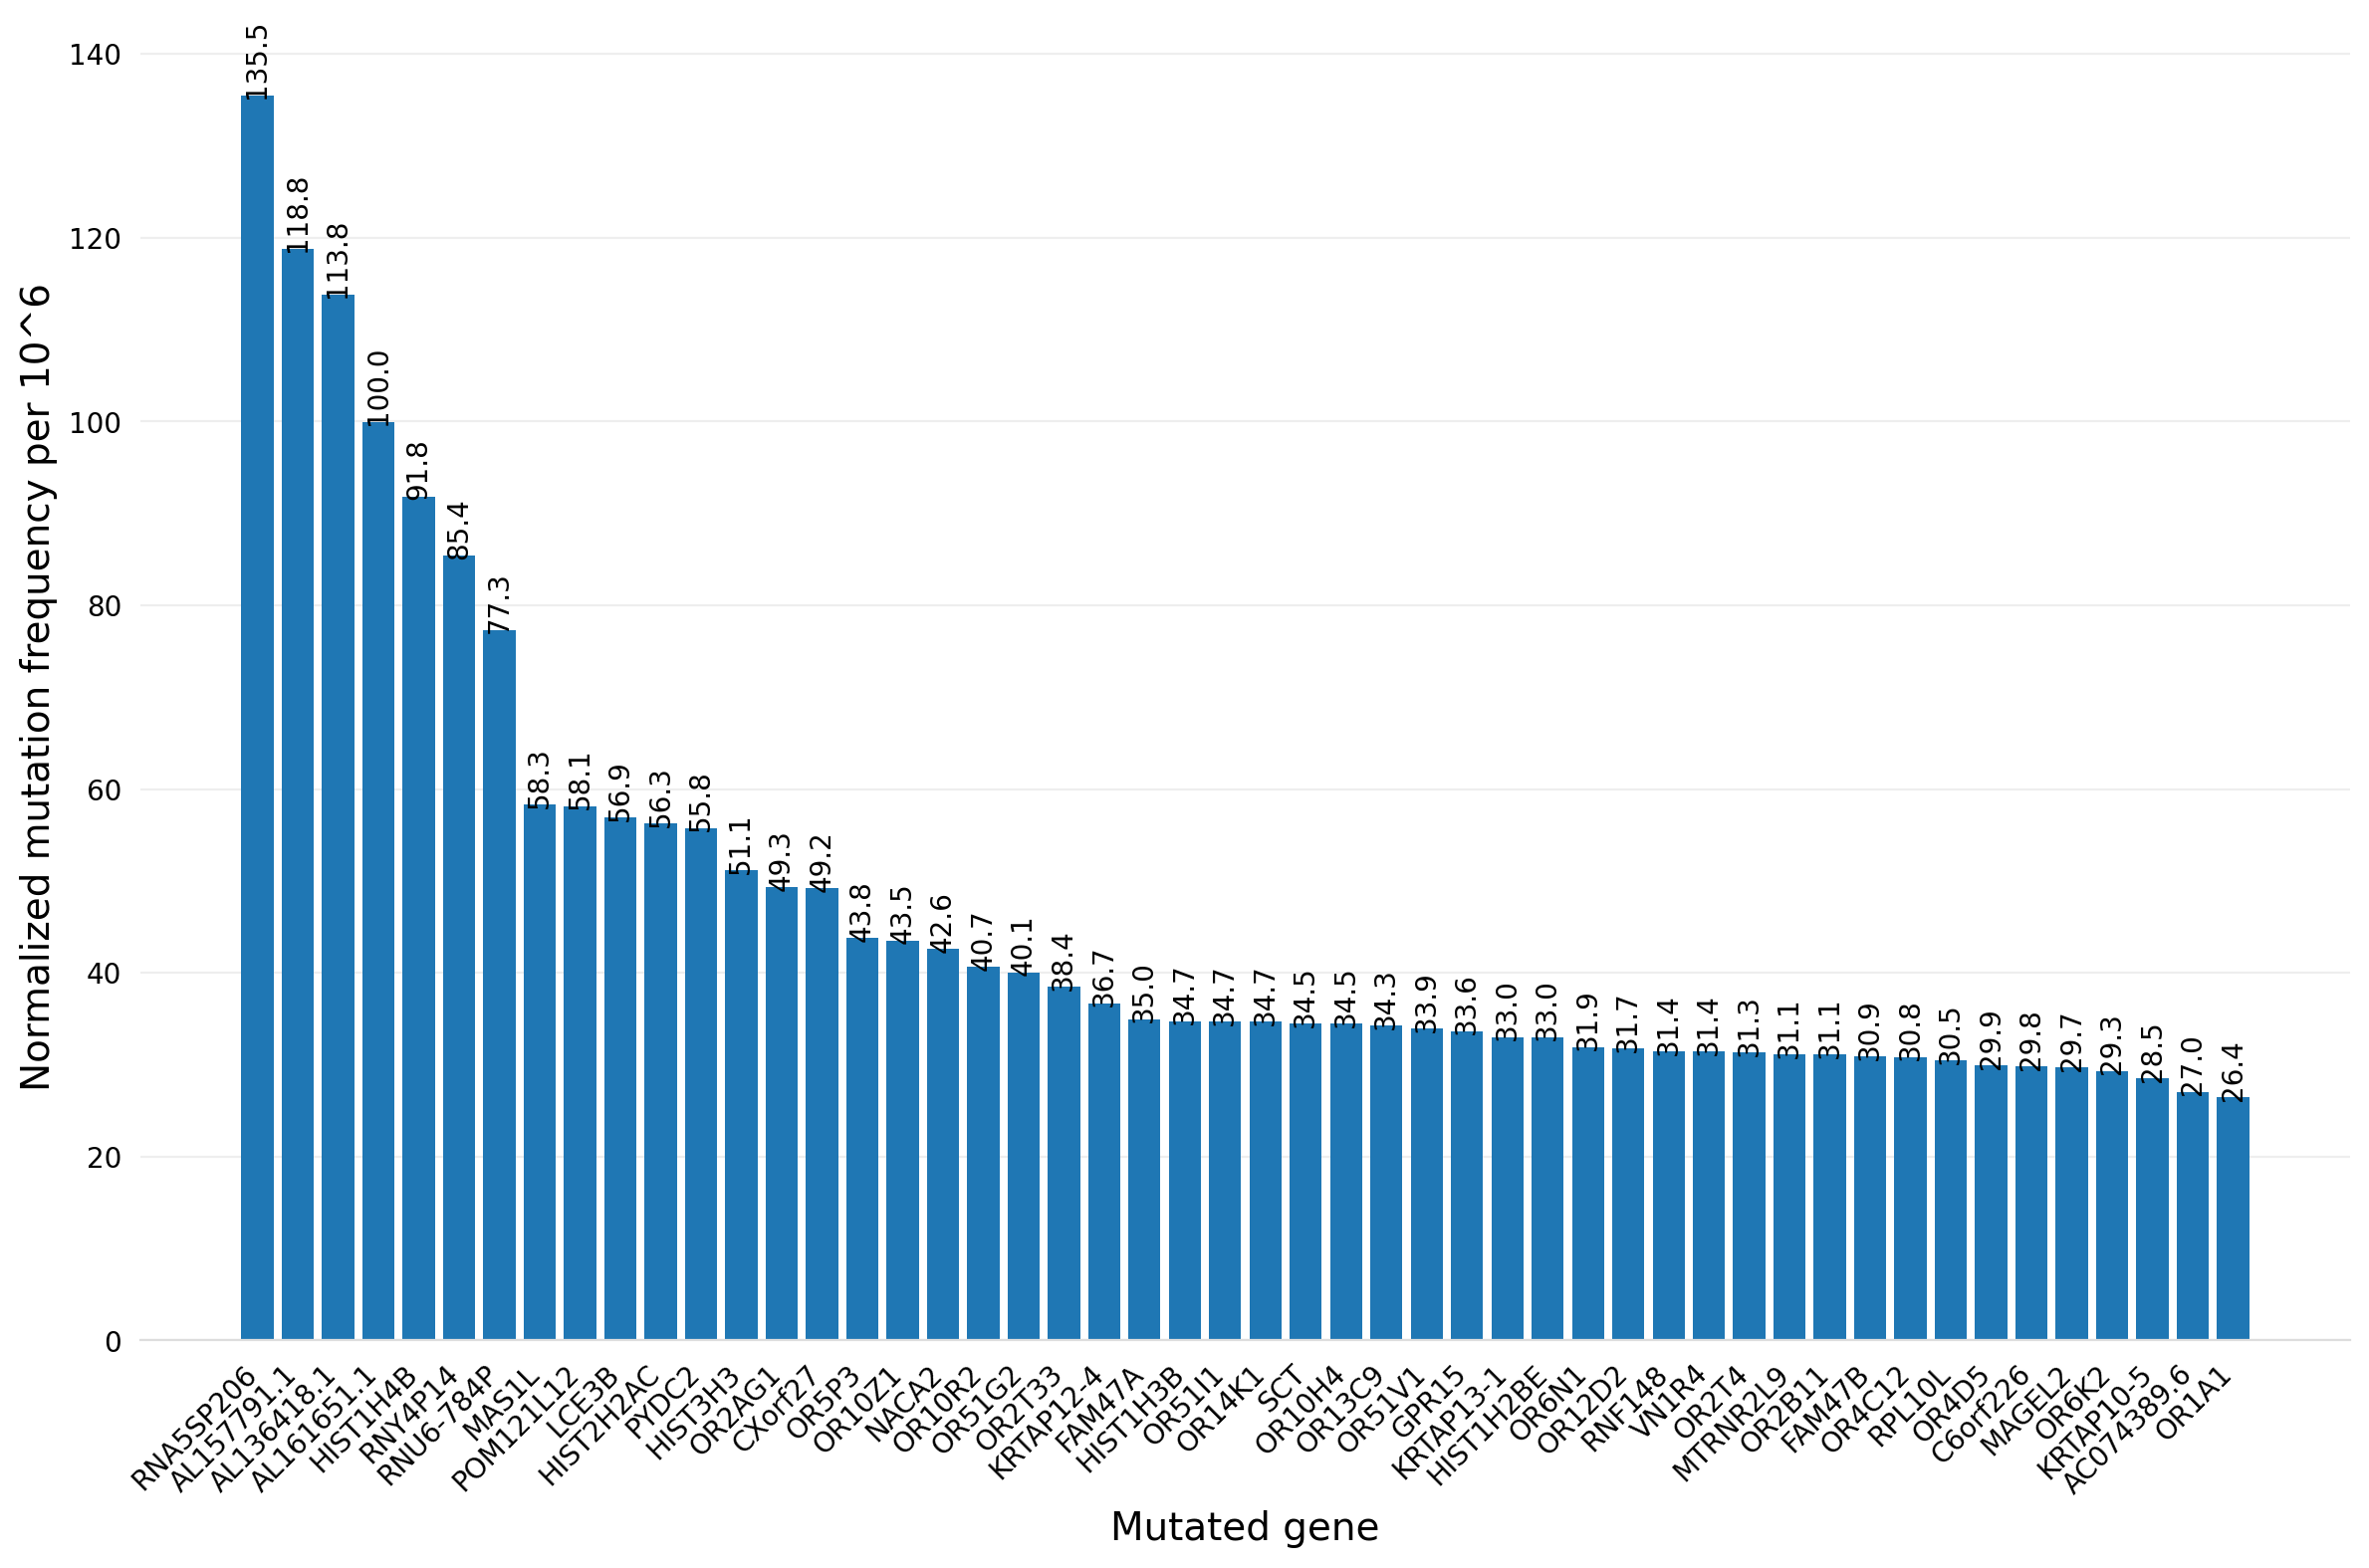

In [77]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_normalized_frequency['Hugo_Symbol'], highest_mutated_genes_normalized_frequency['Normalized mutation frequency per 10^6'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Normalized mutation frequency per 10^6', fontsize=14)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()